# Homework 1

In this homework you will be doing Decision Tree classification on the Breast Cancer dataset.
We will also be using data preprocessing to test ways to improve the classifier.


## Import all necessary libraries

In [145]:
# you should be familiar with numpy, pandas and matplotlib from HW0
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# we're using the Breast Cancer dataset from sklearn.datasets
from sklearn import datasets

# we will also be using the PCA library from scikit learn for this exercise
from sklearn.decomposition import PCA

# we will use the StandardScaler method to z-score normalize our data
from sklearn.preprocessing import StandardScaler

# Remember you have to run this cell block before continuing!


In [147]:
# Load the dataset
breast_cancer_sk = datasets.load_breast_cancer(as_frame=True)
breast_cancer = pd.DataFrame(breast_cancer_sk.data, columns = breast_cancer_sk.feature_names)
breast_cancer["target"] = breast_cancer_sk.target
breast_cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


## 1. Random Sampling [Anurata Hridi]

In this following exercise, you will be writting code to implement random sampling without replacement from scratch. No additional libraries are allowed.

In [162]:
# Random is the only additional library you can use for this problem
import random

def random_sampling(data, n):
    """
    Input: data: the pandas dataframe to sample.
           n: the number of samples (rows) to take
    Output: The randomly sampled dataset (without replacement) as a pd.Dataframe.
    Hint: You should look up the random.shuffle function
    """
    indices = list(data.index)
    random.shuffle(indices)
    selected_indices = indices[:n]
    return data.loc[selected_indices]


In [164]:
# Test your function
sample = random_sampling(breast_cancer,30)                                                                                                                                                                                     

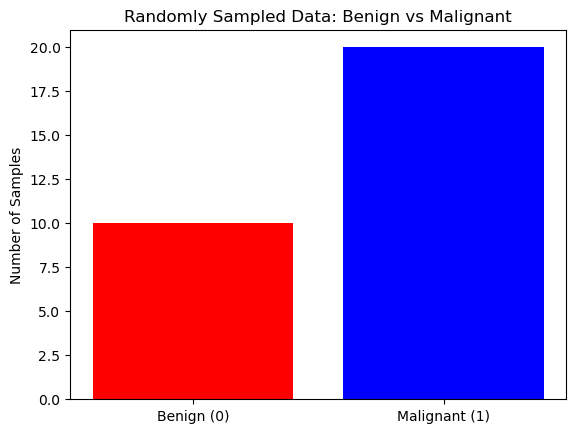

In [160]:
# Look at the distribution of the species (target attribute)
# How evenly are the species distributed with random sampling?

class_counts = sample['target'].value_counts()
plt.bar(class_counts.index, class_counts.values, color=['blue', 'red'])
plt.xticks([0, 1], ['Benign (0)', 'Malignant (1)'])
plt.ylabel('Number of Samples')
plt.title('Randomly Sampled Data: Benign vs Malignant')
plt.show()


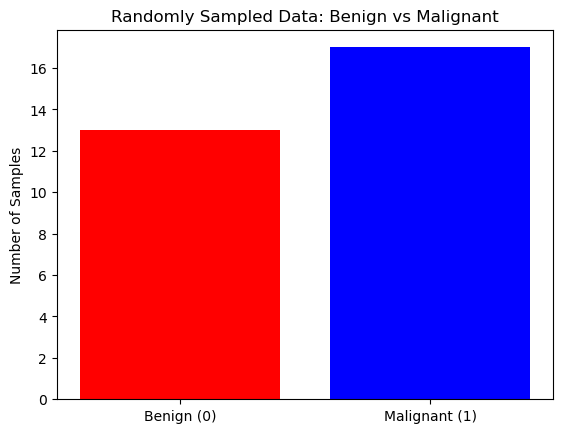

In [166]:
# Try running it again - are the results the same?
class_counts = sample['target'].value_counts()
plt.bar(class_counts.index, class_counts.values, color=['blue', 'red'])
plt.xticks([0, 1], ['Benign (0)', 'Malignant (1)'])
plt.ylabel('Number of Samples')
plt.title('Randomly Sampled Data: Benign vs Malignant')
plt.show()

In [168]:
# Assert that the correct number of rows were samples
np.testing.assert_equal(sample.shape,(30, 31))
# Assert sampling was done without replacement
assert sample.drop_duplicates().shape[0] == 30
# Assert that the first row is present in the original dataframe
assert any([(breast_cancer.iloc[i,:] == sample.iloc[0,:]).all() for i in breast_cancer.index])

## 2. Stratified sampling [Anurata Hridi]

In this part, you will be writing code to do stratified sampling. Create a stratrified sample of the `breast_cancer` dataset, with 40 objects, that has an equal number of each **target** value (0 and 1).

**Store it in the variable `stratified_breast_cancer`**.

**Hint**: You should read about the [split-apply-combine](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html) coding pattern in Pandas before starting this problem! In particular pay attention to the following:
* [Splitting an object into groups](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#splitting-an-object-into-groups)
* [Transformation](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#transformation)


In [171]:
def stratified_sampling(data, n, attr):
    """
    Input: data: the dataset to sample
           n: the number of instances sampled from each value of the given attribute
           attr: the attribute to stratify on
    Output: The sampled dataset in pd.Dataframe format
    
    Allowed functions: df.groupby, df.apply, df.sample
    Hint: See the link in the function description above.
    """
    stratified_sample = data.groupby(attr, group_keys=False).apply(lambda x: x.sample(n=n))
    return stratified_sample.reset_index(drop=True)

In [173]:
# Test your function!
stratified_breast_cancer = stratified_sampling(breast_cancer, 10, 'target')

# View your output

/var/folders/y7/8w_nzg796694ts21qkcmd9hh0000gn/T/ipykernel_1046/2080718199.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample = data.groupby(attr, group_keys=False).apply(lambda x: x.sample(n=n))


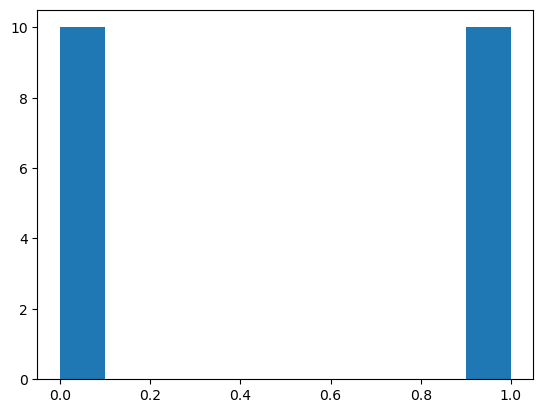

In [175]:
# look at distribution of target values, they supposed to be equally sampled.
plt.hist(stratified_breast_cancer["target"])
plt.show()
assert(stratified_breast_cancer.shape[0] == 20)
assert(sum(stratified_breast_cancer.target == 0) == 10)
assert(sum(stratified_breast_cancer.target == 1) == 10)

## 3. Decision Trees [Vodelina Samatova]

Now we are going to classify the malignant versus benign cases (the zeros versus the ones) with Decision Trees.

You can perform classification using a DecisionTree in python using the scikit-learn library. 

Take a look at the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) to get a clear understanding of all function arguments.

Given below is a simple toy example for you to learn how to use the DecisionTreeClassifier.

In [178]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
# we will use the MinMaxScaler method to scale our data
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

breast_cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [180]:
# y: target
# Check the shape of y
y = breast_cancer['target']
y.shape


(569,)

In [182]:
# X: predictors
# Let's drop the column for the target variable
X = breast_cancer.drop(columns=['target'])

# Check the shape of X
X.shape


(569, 30)

In the first step, we will split our data into train and test subsets. To get more insight into the function we are using here (*train_test_split()*), take a look at [this tutorial.](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

* `X_train` is the features (independent variables) of the training dataset.
* `y_train` is the target (dependent) variable of the training dataset.
* `X_test` is the features (independent variables) of the test dataset.
* `y_test` is the target (dependent) variable of the test dataset.

In [185]:
def stratified_split(X, y, 
                     test_size=0.2, 
                     validate_size=0.2, 
                     random_state=0):

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, test_size=test_size, random_state = random_state)

    # We need to calculate a new split size (the proportion of validation to the remaining)
    
    # let's assume we had 100 samples and we don't do this
    # then the split will be 20 + (20% of 80) + (80% of 80). 
    # But we want 20 + 20 + 60
    new_validate_size = validate_size / (1 - test_size)
    
    X_train, X_val, y_train, y_val = train_test_split(
        X_train, y_train, stratify=y_train, 
        test_size=new_validate_size, 
        random_state = random_state)

    return X_train, X_test, X_val, y_train, y_test, y_val

In [187]:
# Split data into training, validation, and testing data sets
X_train, X_test,X_val, y_train, y_test,y_val = stratified_split(X, y,
                     test_size=0.2,
                     validate_size=0.2,
                     random_state=0)


In [189]:
# Examine the split proportions 

print ("Training (X_train and y_train): \t", X_train.shape, " \t", y_train.shape)

print ("Validation (X_val and y_val): \t\t", X_val.shape, " \t", y_val.shape)

print ("Testing (X_test and y_test): \t\t", X_test.shape, "  \t", y_test.shape)

Training (X_train and y_train): 	 (341, 30)  	 (341,)
Validation (X_val and y_val): 		 (114, 30)  	 (114,)
Testing (X_test and y_test): 		 (114, 30)   	 (114,)


In [191]:
# Inspect X_train
print(X_train)


     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
378       13.660         15.15           88.27      580.6          0.08268   
520        9.295         13.90           59.96      257.8          0.13710   
71         8.888         14.64           58.79      244.0          0.09783   
536       14.270         22.55           93.77      629.8          0.10380   
397       12.800         17.46           83.05      508.3          0.08044   
..           ...           ...             ...        ...              ...   
490       12.250         22.44           78.18      466.5          0.08192   
465       13.240         20.13           86.87      542.9          0.08284   
204       12.470         18.60           81.09      481.9          0.09965   
458       13.000         25.13           82.61      520.2          0.08369   
5         12.450         15.70           82.57      477.1          0.12780   

     mean compactness  mean concavity  mean concave points  mea

In [193]:
# Inspect y_train
print (y_train)

378    1
520    1
71     1
536    0
397    1
      ..
490    1
465    1
204    1
458    1
5      0
Name: target, Length: 341, dtype: int64


Now implement a decision tree function below to do the following:

1. Train a decision tree model with the **training datasets** created above (using **gini index** as the criteria and **random_state = 1234** in order to keep consistency).
2. Use the model trained from step 1 to make predictions on the **test data** created above

**Store the predictions in the variable `dtree_predictions`**. 

In [196]:
def decision_tree_function(X_train, y_train, X_test, random_state=1234):
  dtree = DecisionTreeClassifier(criterion='gini', random_state=1234)
  dtree.fit(X_train, y_train)
  dtree_predictions = dtree.predict(X_test)
  return dtree_predictions


In [198]:
# Test your result!
dtree_predictions= decision_tree_function(X_train,y_train,X_test,y_test)
dtree_predictions

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1])

In this step, you will look into the accuracy score of the decision tree predictions. In other words, you would compare the predictions of the decision tree with the actual test labels you have in the testing set. 

For more documentation, take a look at [this article.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

In [201]:
accuracy_score(dtree_predictions, y_test)

0.9035087719298246

In [203]:
# Public tests for dtree
np.testing.assert_almost_equal(
    accuracy_score(dtree_predictions,
                   y_test),
    0.9035087719298246
)

## 4. Feature Selection [Vodelina Samatova]

In this problem, you will see if feature selection can improve the accuracy of your classifier!

We do feature selection to remove unnecessary features, and also to see which features are most useful for prediction. You could imagine predicting diabetes progression would be easier if we know which features are relevant for doing so.

In the function below, you will implement a feature selection aglorithm, which selects the $k$ best features according to some measure. In this case we'll use the  [ANOVA F-value](https://www.statisticshowto.com/probability-and-statistics/f-statistic-value-test/), which is a measure of the linear relationship between each feature and the target variable (just like correlation).

**Note**: Remember, we can't peek at the test data, even during feature selection (if we knew what features were useful on the test dataset, that would be unrealistic). Therefore, it is important that you fit the the feature selction function **ONLY** on the *training* set. One the feature selector is fit (i.e. figures out which features to keep), you can use it to transform both training and testing dataset (`X_train` and `X_test`), i.e. remove the unneeded features.

**HINT**: Feature selection is performed using [SelectKBest function](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html) with [ANOVA F-value](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html#sklearn.feature_selection.f_classif) function.

**HINT**: In python you can return multiple values, separated by commas, e.g. `return 1, 2, 3`.

In [206]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

def feature_selection(X_train, y_train, X_test, k=7):
    """
     Input:
          x_train: A numpy array of shape (n_training_rows, n_attributes) where n_training_rows refers to 
          the number of rows in your training dataset and n_attributes refers to the number of attributes. 
          y_train: A numpy array of shape (n_training_rows, ) containing the class labels for each row in your 
          training dataset.
          x_test: A numpy array of shape (n_testing_rows, n_attributes) where n_testing_rows refers to the number 
          of rows in your testing dataset and n_attributes refers to the number of attributes. 
          k: number of features to select.
    Output:
          fs: The fit feature selector
          X_train_selected: The transformed training set, with features selected. 
                            The result should be a numpy array of shape (n_training_rows, k).
          X_test_selected: The transformed testing set, with features selected.
    
    Allowed Libraries: sklearn
    """

    # define feature selection
    fs = SelectKBest(score_func=f_classif, k=k)

    # apply feature selection
    X_train_selected = fs.fit_transform(X_train, y_train)
    X_test_selected = fs.transform(X_test)
    return fs, X_train_selected, X_test_selected


In [208]:
# Test your function

fs,X_train_selected,X_test_selected = feature_selection(X_train, y_train, X_test, 7)

# Check the score for each individual feature (i.e. how important is each feature)
print(fs.scores_)

# Check whether acheived seven best attributes for both training and testing set
print(X_train_selected.shape)
print(X_test_selected.shape)

[3.88025770e+02 7.08854777e+01 4.18029021e+02 3.36880602e+02
 5.01255702e+01 2.05381888e+02 3.95714153e+02 5.53613324e+02
 4.34502810e+01 3.52685992e-02 1.84879323e+02 3.68284617e-01
 1.77655322e+02 1.60615071e+02 4.51961967e-01 4.28794755e+01
 3.85754122e+01 1.01944172e+02 1.46946004e-01 8.18170914e+00
 4.79579810e+02 9.18694127e+01 4.95696897e+02 3.52940911e+02
 6.96036727e+01 1.84940066e+02 2.81178021e+02 5.70465714e+02
 6.35428353e+01 4.64644363e+01]
(341, 7)
(114, 7)


In [214]:
# Let's get the name of the selected features

print("Original features are: \n" + str(X_train.columns.values))

print("Selected best feautures are: \n" + str(X_train.columns.values[fs.get_support()]))

Original features are: 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Selected best feautures are: 
['mean perimeter' 'mean concave points' 'worst radius' 'worst perimeter'
 'worst concave points']


In [216]:
# Public tests for feature_selection
fs, selected_train, selected_test = feature_selection(X_train, y_train, X_test, 5)
assert (selected_train.shape[1] == 5)
assert (selected_test.shape[1] == 5)
assert ('concavity error' not in X_train.columns.values[fs.get_support()])
assert ('worst radius' in X_train.columns.values[fs.get_support()])

## 5. Feature Transformation [Sogolsadat Mansouri]

Now we will combine feature selection with normalization into a *pipeline*, and test whether it improves our mode.

In some cases, you would want to perform certain feature transformations such as z-score normalization.

Take a look at the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) to get a clear understanding of all function argumetns for z-score normalization.

Given below is a simple example for you to learn how to use z-score normalization and combine it with other data processing procedures. 

In [220]:
# let's use a toy dataset to demonstrate z-score normalization. 
# We are using the wine dataset from sklearn.datasets as our toy dataset.


# First load the data
breast_cancer_sk = datasets.load_breast_cancer(as_frame=True)
breast_cancer["target"] = breast_cancer_sk.target
breast_cancer

# To emulate an actual model learning process, we split the data set into trainining and testing set
breast_cancer_train, breast_cancer_test = train_test_split(breast_cancer, test_size = 0.33)

# Here we use StandardScaler class from sklearn to normalize
breast_cancer_norm_train = StandardScaler().fit(breast_cancer_train).transform(breast_cancer_train)

# Notice here we use the training set to fit the StandardScaler, i.e. compute the mean and standard deviation,
# and use it to normalize testing set, just like with feature selection, above.
# This is because in real-world deployment case, you very likely won't know the parameter of unseen data distribution
# (testing set). So a normal approach is to use distribution parameters estimated from training set to transform
# unseen data.
breast_cancer_norm_test = StandardScaler().fit(breast_cancer_train).transform(breast_cancer_test)


In [222]:
# Note the means are all different
breast_cancer_train.mean()

mean radius                 14.178759
mean texture                19.448924
mean perimeter              92.297454
mean area                  660.649344
mean smoothness              0.095747
mean compactness             0.103725
mean concavity               0.089504
mean concave points          0.048589
mean symmetry                0.180491
mean fractal dimension       0.062625
radius error                 0.415405
texture error                1.234612
perimeter error              2.933862
area error                  41.994588
smoothness error             0.007016
compactness error            0.026023
concavity error              0.033106
concave points error         0.011995
symmetry error               0.020297
fractal dimension error      0.003808
worst radius                16.378215
worst texture               26.003123
worst perimeter            107.969659
worst area                 895.425722
worst smoothness             0.131613
worst compactness            0.253611
worst concav

In [224]:
# And the standard deviations vary
breast_cancer_train.std()

mean radius                  3.540208
mean texture                 4.221676
mean perimeter              24.340978
mean area                  356.346608
mean smoothness              0.013366
mean compactness             0.050056
mean concavity               0.078669
mean concave points          0.037483
mean symmetry                0.026101
mean fractal dimension       0.006826
radius error                 0.300409
texture error                0.549381
perimeter error              2.188017
area error                  50.967577
smoothness error             0.003115
compactness error            0.018844
concavity error              0.033176
concave points error         0.006340
symmetry error               0.007916
fractal dimension error      0.002861
worst radius                 4.936247
worst texture                6.008409
worst perimeter             34.144444
worst area                 589.521477
worst smoothness             0.022471
worst compactness            0.147734
worst concav

In [226]:
# Now column means are all near 0
print(breast_cancer_norm_train[:,0].mean())
print(breast_cancer_norm_train[:,1].mean())
print(breast_cancer_norm_train[:,2].mean())
print(breast_cancer_norm_train[:,3].mean())

1.6085120986695182e-16
-2.098059259134154e-17
-3.4501418927983867e-16
-1.0606855143400446e-16


In [228]:
# Now and standard deviations are near 1
print(breast_cancer_norm_train[:,0].std())
print(breast_cancer_norm_train[:,1].std())
print(breast_cancer_norm_train[:,2].std())
print(breast_cancer_norm_train[:,3].std())

1.0
1.0
1.0
0.9999999999999999


You will build a pipeline that perform both feature selection (using your earlier function) and z-score normalization.

In [231]:
def normalize_feature_select(X_train, y_train, X_test, k = 7):
    """
    You will build a pipeline that perform the following steps:
        1. z-score normalize the x_train and x_test using x_train.
        2. perform feature selection.
    
    Your inputs and outputs are as shown below:
    
    Input:
          x_train: A numpy array of shape (n_training_rows, n_attributes) where n_training_rows refers to 
              the number of rows in your training dataset and n_attributes refers to the number of attributes. 
          y_train: A numpy array of shape (n_training_rows, ) containing the class labels for each row in your 
              training dataset.
          x_test: A numpy array of shape (n_test_rows, n_attributes) where n_test_rows refers to the number 
              of rows in your target dataset and n_attributes refers to the number of attributes. 
          k: number of features to select.
    Output:
          x_train_selected: A numpy array of shape (n_train_rows, n_selected_attributes) containing 
              z-score normalized data from x_train with selected features only. 
              n_selected_attributes is the number of selected features.
          x_test_selected: A numpy array of shape (n_test_rows, n_selected_attributes) containing 
              z-score normalized data from x_test with selected features only. 
              n_selected_attributes is the number of selected features.
          
    Allowed Libraries: sklearn
    """

    ### BEGIN SOLUTION
    scaler = StandardScaler().fit(X_train)
    X_norm_train = scaler.transform(X_train)
    X_norm_test = scaler.transform(X_test)

    _, X_train_selected, X_test_selected = feature_selection(X_norm_train, y_train, X_norm_test, k=k)

    return X_train_selected, X_test_selected
    ### END SOLUTION
 

In [233]:
#Test your code!
X_norm_selected_train, X_norm_selected_test = normalize_feature_select(X_train, y_train, X_test, k = 7)

# Mean of attribute 0 should be 0
print(X_norm_selected_train[:,0].mean())
# Standard deviation of attriute 0 should be 1
print(X_norm_selected_train[:,0].std())

-5.521813049162069e-16
0.9999999999999999


In [235]:
# Public tests for feature_selection
selected_train, selected_test = normalize_feature_select(X_train, y_train, X_test, 5)
assert (selected_train.shape[1] == 5)
assert (selected_test.shape[1] == 5)
for i in range(0, 5):
    np.testing.assert_almost_equal(X_norm_selected_train[:,i].mean(), 0)
    np.testing.assert_almost_equal(X_norm_selected_train[:,i].std(), 1)
    # test set shouldn't be perfectly centered or scaled
    assert X_norm_selected_test[:,i].mean() != 0
    assert X_norm_selected_test[:,i].std() != 1

Now is the moment of truth - did the decision tree improve our classifier? Let's compare.

In [238]:
# First, let's recreate the original decision tree.
dtree_predictions = decision_tree_function(X_train, y_train, X_test, 1234) # Random see for consistency
accuracy_score(dtree_predictions, y_test)

0.9035087719298246

In [240]:
# Next the normalized, feature selected tree
dtree_norm_selected_predictions = decision_tree_function(X_norm_selected_train, y_train, X_norm_selected_test, 1234)
accuracy_score(dtree_norm_selected_predictions, y_test)

0.9122807017543859

Which features did better - the originals or the normalized, feature selected ones? How much of a difference did preprocessing make? Based on what you know about decision trees, z-score normalization and feature selection, why do you think this was the case? Answer below in 2-3 sentences.

The normalized and feature-selected features performed better. Feature selection reduces the noise and unnecesary data and z-normalisation ensures that all features have uniform contribution, hence the model's efficiency becomes better. This preprocessing reduces overfitting and can enhance the decision tree's generalization on unseen data.

## 6. PCA [Sogolsadat Mansouri]

## Examples

You can perform PCA in python using the scikit-learn library. Take a look at the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to get a clear understanding of all function arguments.

Given below is a simple toy example for you to learn how to use PCA. 

In [246]:
# let's use a toy dataset to demonstrate PCA. We are using the wine dataset from sklearn.datasets as our toy dataset.
# We will apply PCA on it and extract the first two principal components. 
# While there are ways to directly extract the principal components using the sklearn methods, for the purpose 
# of this exercise, we will first extract the eigen vectors and then calculate the principal components from these eigen vectors. 

# first, load and z-score normalize the data
breast_cancer_sk = datasets.load_wine(as_frame=True)
breast_cancer = pd.DataFrame(StandardScaler().fit_transform(breast_cancer_sk.data), columns = breast_cancer_sk.feature_names)

# Display the dataset for your reference
# note that you can use the display() method to display your pandas dataframe in Jupyter
#display(toy_dataset)

# apply PCA on the toy dataset and extract the eigen vectors of the first two principal components
breast_cancer_pca = PCA(n_components = 2).fit(breast_cancer)
breast_cancer_eigen_vectors = breast_cancer_pca.components_

# now extract the first two principal components
# Recall from class material how to do this.  
# Take a look at matrix multiplication using numpy here: 
# https://numpy.org/doc/stable/reference/generated/numpy.matmul.html
breast_cancer_principal_components = np.matmul(breast_cancer.values , breast_cancer_eigen_vectors.T)


In [248]:
# Explore the outputs of the eigen vectors and principal components to gain a better understanding
# Explore other outputs...
print(breast_cancer_eigen_vectors.T.shape)
print(breast_cancer.values.shape)

(13, 2)
(178, 13)


### 6.1: Extracting Eigen Vectors

In [251]:
# Problem 1
def principal_component_analysis(data, n_components):
    """
    Input: 
          data: Data frame with M numeric attributes.
          n_components: the number of principal components to calculate 
                        (e.g. 2 for two principal components)
    Output:
          a numpy array of floating point numbers of shape (n_components, M), 
          containing the first n_components eigen vectors.
            
    """
    return PCA(n_components = n_components).fit(data).components_
  

In [253]:
principal_component_analysis(X_train, 2)[0, :8]

array([4.99525297e-03, 2.14514374e-03, 3.45336870e-02, 5.14453612e-01,
       3.88827136e-06, 4.03315839e-05, 8.18903314e-05, 4.75569636e-05])

In [255]:
# Test your function!
# note that you can convert your pandas data frame into a numpy matrix by using the dataframe.values property
eigen_vectors = principal_component_analysis(X_train, 2)
# Each of the 2 eigen vectors should have a value/weight for each of the original 13 attributes
eigen_vectors.shape

(2, 30)

In [257]:
assert principal_component_analysis(X_train, 2).shape == (2, 30)
np.testing.assert_almost_equal(
    principal_component_analysis(X_train, 2)[0, :8], 
    np.array(
        [4.99525297e-03, 2.14514374e-03, 3.45336870e-02, 5.14453612e-01,
       3.88827136e-06, 4.03315839e-05, 8.18903314e-05, 4.75569636e-05]
    )
)

### 6.2. Calculating Principal Components from Eigen Vectors

In [260]:
# Problem 2
def principal_component_calculation(data, component_weights):
    """
    Input: 
          data: A data frame with N rows and M numeric attributes (e.g. 178 x 13). 
          component_weights: a numpy array of shape (n_components, M) containing the weights (eigen vector) of 
              the first n_components principal components 
              (i.e. the output from running principal_component_analysis from problem 1)
    Output:
          a pandas dataframe of shape (N, n_components) ontaining the n_components principal components,
          calculated for each of the N rows in data.
    Hint: Can you solve this with matrix multiplication? Check out the np.matmul function.
    """
    data_matrix = data.to_numpy()  # Shape (N, M)

    # Perform matrix multiplication to calculate the principal components
    principal_components = np.matmul(data_matrix, component_weights.T)  # Shape (N, n_components)

    # Convert the result back into a pandas DataFrame
    return pd.DataFrame(principal_components, columns=[f"PC{i+1}" for i in range(component_weights.shape[0])])



In [262]:
# Test your function

# note that eigen_vectors are the eigen vectors you calculated earlier using principal_component_analysis. 
# We're calculating it again here for ease of use
eigen_vectors = principal_component_analysis(X_train, 2)
principal_component_values = principal_component_calculation(X_train, eigen_vectors)
print(f'Principal components are = {principal_component_values} and their shape is {principal_component_values.shape}')

Principal components are =             PC1         PC2
0    868.291103 -164.411521
1    418.093546  -55.437415
2    374.966714  -64.673713
3    955.426179 -169.519136
4    775.242686 -134.497198
..          ...         ...
336  780.278195  -83.161657
337  915.691687  -92.041880
338  836.047126  -67.430863
339  812.934184 -126.096073
340  888.198708  -31.182813

[341 rows x 2 columns] and their shape is (341, 2)


In [264]:
print(eigen_vectors)

[[ 4.99525297e-03  2.14514374e-03  3.45336870e-02  5.14453612e-01
   3.88827136e-06  4.03315839e-05  8.18903314e-05  4.75569636e-05
   7.00011566e-06 -2.48710770e-06  2.95116178e-04 -5.72400524e-05
   2.12725805e-03  5.32352216e-02 -8.02364907e-07  5.63169918e-06
   9.03078792e-06  3.52992357e-06 -1.41042728e-06  3.06914401e-08
   7.03136693e-03  3.11704543e-03  4.89055284e-02  8.53712941e-01
   5.96952182e-06  1.01849689e-04  1.68022565e-04  7.33910241e-05
   1.79987844e-05  2.16882881e-06]
 [-1.02756341e-02  9.00565025e-04 -6.82543285e-02 -8.52260367e-01
   2.44253342e-05  2.69513992e-05 -5.00602471e-05 -4.32780781e-05
   4.08272644e-05  2.27374671e-05  5.12275691e-04 -9.11790549e-05
   2.71477307e-03  8.41653188e-02 -2.75738416e-07 -8.30793021e-06
  -2.36040251e-05 -1.25544358e-05 -2.56350331e-06  7.04610664e-07
  -5.53225220e-04  1.12902056e-02 -6.72828947e-03  5.11490545e-01
   8.18704642e-05  2.69429395e-04  1.70943561e-04  8.60904205e-06
   1.68797557e-04  6.31327231e-05]]


In [266]:
test_eigen_vectors = principal_component_analysis(X_train, 2)
test_pc = principal_component_calculation(X_train, test_eigen_vectors)
assert test_pc.shape == (X_train.shape[0], 2)
np.testing.assert_almost_equal(test_pc.iloc[0, :].values, [868.291104, -164.411521], decimal=6)

### 6.3: Visualize your results

You've gained familiarity with matplotlib in HW0. Now use matplotlib to

a) generate a plot with the first principal component on x-axis, second principal component on y-axis. 

b) Assign color to each data point according to the target value. You can do this using the splitted y_train or y_test, depending on which set you are plotting.  

***Hint 1:*** Take a look at the [plt.scatter](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.scatter.html) function. Pay close attention to the 'c' variable. 

c) Name the x-axis as "PC1", y-axis as "PC2"

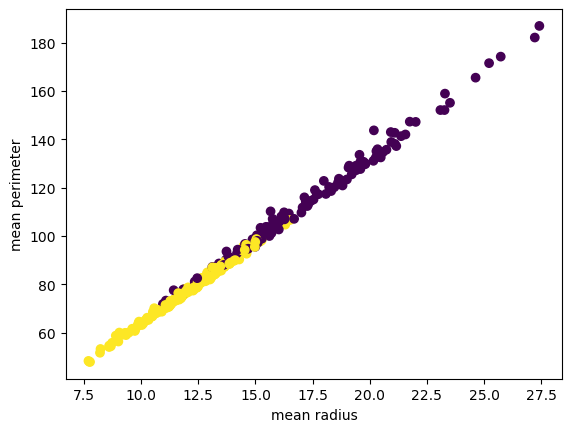

In [276]:
# This is an example of a scatter plot, using the bmi and age of participants
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 2], c=y_train)
plt.xlabel(X_train.columns[0])
plt.ylabel(X_train.columns[2])
plt.show()

# How well does this plot separate the 2 different classes?
It does not seperate the values well since there is a significant overlap making the difference not visible clearly.

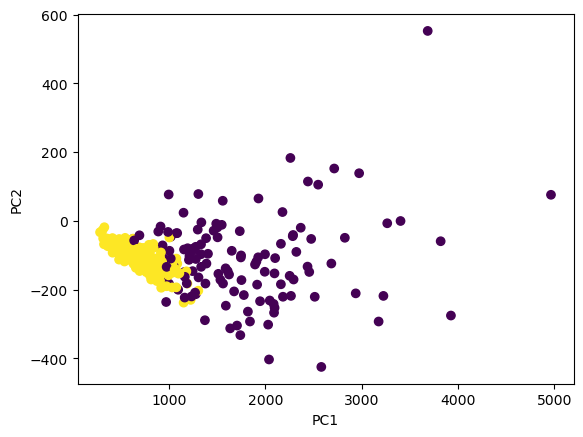

In [278]:
# Problem 3 (see question above)

# recalculating eigen vectors and principal components for ease of use
eigen_vectors = principal_component_analysis(X_train, 2)
principal_component_values = principal_component_calculation(X_train, eigen_vectors)

## BEGIN SOLUTION
plt.scatter(principal_component_values.iloc[:, 0], principal_component_values.iloc[:, 1], c=y_train)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()
## END SOLUTION


Do the first 2 PCs separate the data better than the first 2 numeric attributes?

In [ ]:
Yes, they do since there is a lot more clarity due to scattered plotting of data.